# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Create Datset

In [2]:
df = pd.read_csv("data/petrol_consumption.csv")

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Set X and y

In [4]:
X = df[['Petrol_tax', 'Average_income']].values
y = df['Petrol_Consumption'].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=11)

# Fit

In [6]:
knn = KNeighborsRegressor(n_neighbors=4,metric="cosine")
knn.fit(x_train, y_train)

KNeighborsRegressor(metric='cosine', n_neighbors=4)

# Visualize

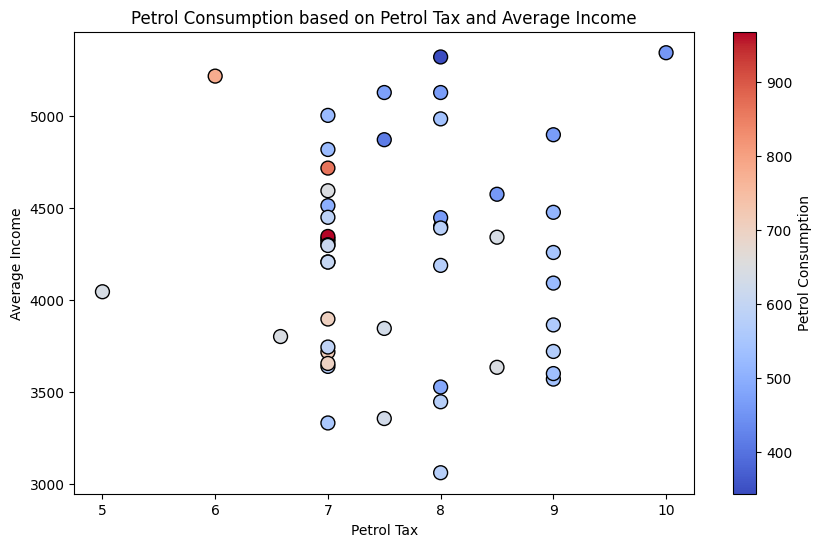

In [7]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for Petrol_tax vs. Average_income, colored by Petrol_Consumption
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.xlabel('Petrol Tax')
plt.ylabel('Average Income')
plt.title('Petrol Consumption based on Petrol Tax and Average Income')

# Add colorbar to indicate Petrol Consumption values
plt.colorbar(label='Petrol Consumption')


# Voting

In [8]:
new_point = np.array([[9.2, 3700]]) # (Petrol Tax, Average Income)

The predicted petrol consumption for the new data point is: 554.5


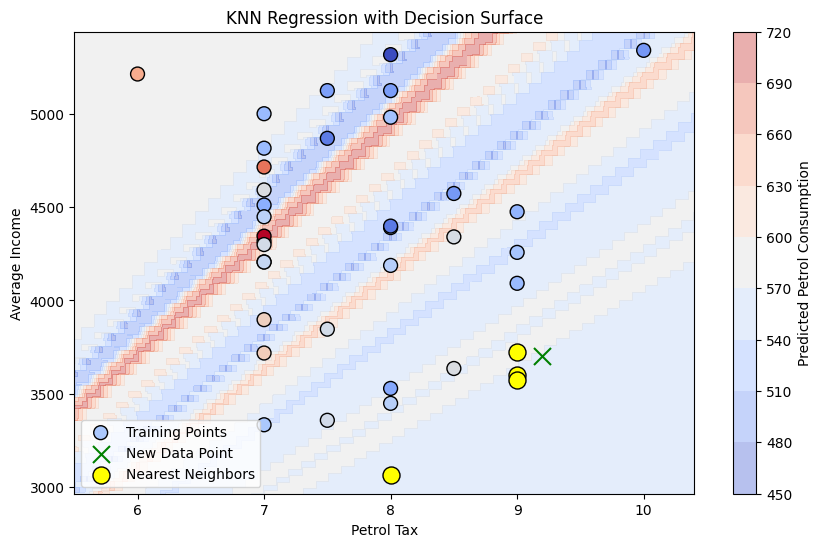

In [9]:
# Predict the petrol consumption for the new point
predicted_value = knn.predict(new_point)
print(f"The predicted petrol consumption for the new data point is: {predicted_value[0]}")

# Identify the k-nearest neighbors
neighbors_idx = knn.kneighbors(new_point, return_distance=False)  # Extract the first array (indices)
neighbor_points = x_train[neighbors_idx][0]  # Get the actual neighbor points from x_train

# Define meshgrid for decision surface
h = 0.1  # Step size for the mesh
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 100, x_train[:, 1].max() + 100  # Use x_train for y limits
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Contour plot for predicted petrol consumption values (regression surface)
contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.colorbar(contour, label='Predicted Petrol Consumption')

# Scatter plot of the training data points, colored by y_train
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', s=100, edgecolors='k', label='Training Points')

# Mark the new point (green 'x')
plt.scatter(new_point[0, 0], new_point[0, 1], c='green', s=150, marker='x', edgecolors='k', label='New Data Point')

# Highlight nearest neighbors (yellow circle)
plt.scatter(neighbor_points[:, 0], neighbor_points[:, 1], c='yellow', s=150, marker='o', edgecolors='black', label='Nearest Neighbors')

# Add labels and title
plt.xlabel('Petrol Tax')
plt.ylabel('Average Income')
plt.title('KNN Regression with Decision Surface')
plt.legend()
plt.show()


# Illustration

In [10]:
# https://www.math3d.org/9lZ2f9Dl4

In [10]:
def euclidean_distance(point1, point2):
    x1,y1,z1 = point1
    x2,y2,z2 = point2
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    print(distance)
    # return distance

In [11]:
point_x = (3700,9.5,560)
point_7 = (3718,7,560)
point_8 = (3600,8,530)

In [12]:
euclidean_distance(point_x, point_7)
euclidean_distance(point_x, point_8)

18.172781845386247
104.41384007879415


# Assignment

<li> Predict
<li> Evaluate
<li> Try with Scaling